<h2 style="color:darkred;font-size:30px">Text Preprocessing • Week 2</h2>

---
---
---

<div style="text-align: right"> <h2 style="color:darkred;font-size:15px">by Fırat YAŞAR</h2></div>

_This notebook is created for the course MATH410 Natural Language Processing with Deep Learning in the Master Program in Data Science at Galatasaray University. https://ects.gsu.edu.tr/en/program/index/193_


_This work is supported by SFEIR https://www.sfeir.com/fr/_


<img src="https://github.com/yasarigno/NLP_DeepLearning_Course/blob/main/files/sfeir.png?raw=true" alt="SFEIR Logo" width="256" height="128">

---

<h2 style="color:darkred;font-size:20px">Contents</h2>
    
    0. Use cases and packages
    1. Explore textual data - Word Clouds
    2. Tokenization
    3. Stemmıng & Lemmatizatıon
    4. Transfer Learning

## 0. Use cases and packages

### Use Cases of NLP:

1. Information Extraction (extract email addresses from text)
2. Speech-to-Text Conversion (Siri, Alexa, YouTube subtitles etc.)
3. Text Classification (spam filtering, sentiment analysis, topic inference)
4. Text Generation (Google’s Smart Compose writes emails)

### Packages:

**Text preprocessing**
- NLTK 
- SpaCy
- Gensim

**Word Embeddings**
- word2vec (Google, 2013)
- GloVe (Stanford, 2014)
- fastText (Facebook, 2016)

## 1. Explore textual data - Word Clouds

A **word cloud** is a snapshot of a text meant to help you explore and understand it at a glance.

How it works?

Number of the word in the data $||$ Size of the string on the word cloud

In [1]:
# import the wordcloud library

from wordcloud import WordCloud

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state=8,
                      normalize_plurals=False,
                      width=600,
                      height=300,
                      max_words=300,
                      stopwords=[])

#### Do not forget to install the required library 

``pip install wordcloud``

Here is [the documentation of wordcloud](https://amueller.github.io/word_cloud/)

### 1.1 Get the textual data

Note that we use ``requests`` library to extract data from a website (from wikipedia).

We define a function wikipedia_page which returns the page of a ``title``.

In [2]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

In [3]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
earth = wikipedia_page('Earth').lower()
print(earth) 

earth is the third planet from the sun and the only astronomical object known to harbor life. while large volumes of water can be found throughout the solar system, only earth sustains liquid surface water. about 71% of earth's surface is made up of the ocean, dwarfing earth's polar ice, lakes, and rivers. the remaining 29% of earth's surface is land, consisting of continents and islands. earth's surface layer is formed of several slowly moving tectonic plates, interacting to produce mountain ranges, volcanoes, and earthquakes. earth's liquid outer core generates the magnetic field that shapes earth's magnetosphere, deflecting destructive solar winds.
earth's atmosphere consists mostly of nitrogen and oxygen. greenhouse gases in the atmosphere like carbon dioxide (co2) trap a part of the energy from the sun close to the surface. water vapor is widely present in the atmosphere and forms clouds that cover most of the planet. more solar energy is received by tropical regions than polar re

### 1.2 Create a wordcloud

In [4]:
# Apply the wordcloud to the text.
wordcloud.generate(earth)

(-0.5, 599.5, 299.5, -0.5)

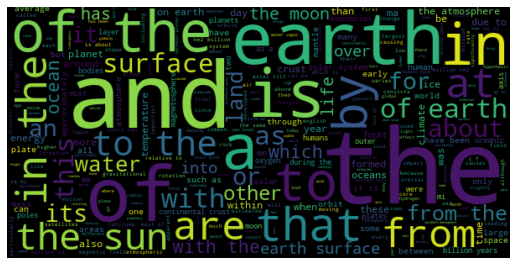

In [5]:
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud.generate(earth), interpolation='bilinear')

# and remove the axis
plt.axis("off")

#### Let us look at to another page: geometry

(-0.5, 599.5, 299.5, -0.5)

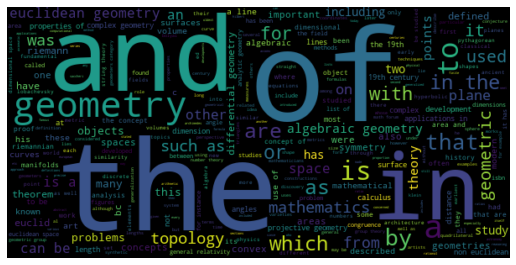

In [6]:
title_geometry = wikipedia_page('Geometry').lower()

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud.generate(title_geometry), interpolation='bilinear')

# and remove the axis
plt.axis("off")

### 1.3 Remove stop words

**Stop words** are words that do not provide any useful information to infer content or nature.

In [7]:
from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
earth_word_list = earth.split(' ')

# and count the words
earth_word_counts = Counter(earth_word_list)

In [8]:
for w in earth_word_counts.most_common(20):
    print(f"{w[0]}:  \t{w[1]} ")

the:  	687 
of:  	344 
and:  	276 
is:  	170 
to:  	168 
in:  	146 
a:  	128 
earth's:  	105 
earth:  	71 
from:  	71 
with:  	68 
by:  	67 
as:  	66 
that:  	60 
at:  	56 
are:  	52 
about:  	44 
surface:  	43 
solar:  	41 
it:  	40 


In [9]:
# transform the text into a list of words
earth_words_list = earth.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
earth_without_stopwords = [word for word in earth_words_list if word not in stopwords]

In [10]:
Counter(earth_without_stopwords).most_common(20)

[("earth's", 105),
 ('earth', 71),
 ('about', 44),
 ('surface', 43),
 ('solar', 41),
 ('it', 40),
 ('on', 38),
 ('million', 36),
 ('have', 35),
 ('which', 32),
 ('or', 30),
 ('has', 29),
 ('into', 28),
 ('life', 27),
 ('sun', 26),
 ('water', 25),
 ('atmosphere', 25),
 ('than', 25),
 ('other', 24),
 ('over', 24)]

(-0.5, 599.5, 299.5, -0.5)

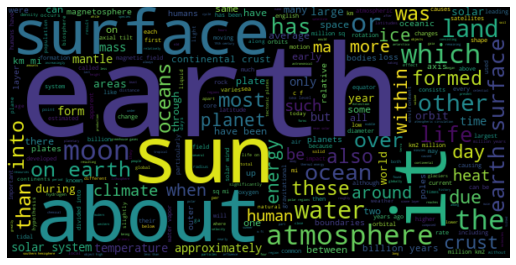

In [11]:
# Transform the list of words back into a string 
earth_without_stopwords  = ' '.join(earth_without_stopwords)

# Apply the wordcloud to the text.
wordcloud.generate(earth_without_stopwords)

# And plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Stopwords files

- https://github.com/Alir3z4/stop-words has stopwords in several languages
- https://github.com/igorbrigadir/stopwords lists several sources of stopwords.

In [12]:
import numpy as np
earth = wikipedia_page('Earth').lower()
earth_word_list = earth.split(' ')
earth_word_counts = Counter(earth_word_list).most_common(10)

maxfreq = earth_word_counts[0][1]
print(f" rank word  observed frequency ~= Zipf frequency")

for i in range(10):
#     print(f"{i+1}) {word_counts[i][0]} \tfreq: {word_counts[i][1] / word_counts[0][1]} ~= {1/(i+1)}")
    print(f"{i+1:4}) {earth_word_counts[i][0]:10} freq: {np.round(earth_word_counts[i][1] / earth_word_counts[0][1],2):5} ~= {np.round(1/(i+1),2)}")

 rank word  observed frequency ~= Zipf frequency
   1) the        freq:   1.0 ~= 1.0
   2) of         freq:   0.5 ~= 0.5
   3) and        freq:   0.4 ~= 0.33
   4) is         freq:  0.25 ~= 0.25
   5) to         freq:  0.24 ~= 0.2
   6) in         freq:  0.21 ~= 0.17
   7) a          freq:  0.19 ~= 0.14
   8) earth's    freq:  0.15 ~= 0.12
   9) earth      freq:   0.1 ~= 0.11
  10) from       freq:   0.1 ~= 0.1


#### See : Zipf's law  

https://en.wikipedia.org/wiki/Zipf%27s_law

### 1.4 Another example :

We use the pre-defined list of stopwords of the library NLTK to remove the stopwords from a textual data.

In [13]:
import nltk

from nltk.corpus import stopwords

nltk.download("punkt") # punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('turkish'))

[nltk_data] Downloading package punkt to /Users/fyasar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fyasar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Define the wiki function for the turkish language

In [14]:
def wikipedia_page_tr(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://tr.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

In [15]:
bilim = wikipedia_page_tr("Bilim")
bilim

'Bilim, nedensellik, merak ve amaç besleyen, olguları ve iddiaları deney, gözlem ve düşünce aracılığıyla sistematik bir şekilde inceleyen entelektüel ve pratik disiplinler bütünüdür. Bir parantez açmak gerekirse bu tanımın "ilim" için geçerli olmadığının altını çizmek gerekir. Zira bilim somut, dünyevî ve evrensel olayları kendine konu edinmişken ilim manevî olaylarla da ilgilenebilir fakat somut kanıt sunmaz. Bilimi sınıflandıran bilim felsefecileri bilimi formal, sosyal ve fennî bilimler olmak üzere üçe ayırır. Bilimin diğer tüm disiplinlerden en farklı karakteristiği, savunmalarını somut kanıtlarla sunmasıdır. Ve bu da bilimi en güvenilir disiplin olarak günümüze kadar birçok alt dala bölmüş, insanların daha iyi yaşam koşullarına kavuşmasına, bilinmeyen olguları bulmamıza ve yeni şeyler öğrenmemize önayak olmuştur. Tüm bilim dalları evrenin bir bölümünü kendine konu olarak seçer, deneysel yöntemlere ve gerçekliğe dayanarak yasalar çıkarmaya çalışır. Einstein bilimi, her türlü düzend

#### With stopwords 

(-0.5, 599.5, 299.5, -0.5)

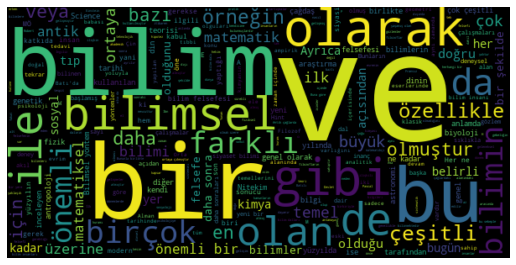

In [16]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud.generate(bilim), interpolation='bilinear')

# and remove the axis
plt.axis("off")

#### Without stopwords

In [17]:
# transform the text into a list of words
bilim_words_list = bilim.split(' ')

# use nltk stop-words to remove the stopwords from bilim
bilim_without_stopwords = [ word for word in bilim_words_list if word not in stop_words ]

In [18]:
bilim_without_stopwords

['Bilim,',
 'nedensellik,',
 'merak',
 'amaç',
 'besleyen,',
 'olguları',
 'iddiaları',
 'deney,',
 'gözlem',
 'düşünce',
 'aracılığıyla',
 'sistematik',
 'bir',
 'şekilde',
 'inceleyen',
 'entelektüel',
 'pratik',
 'disiplinler',
 'bütünüdür.',
 'Bir',
 'parantez',
 'açmak',
 'gerekirse',
 'tanımın',
 '"ilim"',
 'geçerli',
 'olmadığının',
 'altını',
 'çizmek',
 'gerekir.',
 'Zira',
 'bilim',
 'somut,',
 'dünyevî',
 'evrensel',
 'olayları',
 'kendine',
 'konu',
 'edinmişken',
 'ilim',
 'manevî',
 'olaylarla',
 'ilgilenebilir',
 'fakat',
 'somut',
 'kanıt',
 'sunmaz.',
 'Bilimi',
 'sınıflandıran',
 'bilim',
 'felsefecileri',
 'bilimi',
 'formal,',
 'sosyal',
 'fennî',
 'bilimler',
 'olmak',
 'üzere',
 'üçe',
 'ayırır.',
 'Bilimin',
 'diğer',
 'disiplinlerden',
 'farklı',
 'karakteristiği,',
 'savunmalarını',
 'somut',
 'kanıtlarla',
 'sunmasıdır.',
 'Ve',
 'bilimi',
 'güvenilir',
 'disiplin',
 'olarak',
 'günümüze',
 'kadar',
 'birçok',
 'alt',
 'dala',
 'bölmüş,',
 'insanların',
 'iyi'

(-0.5, 599.5, 299.5, -0.5)

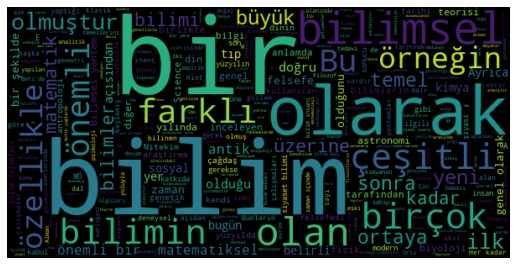

In [19]:
# Transform the list of words back into a string 
text_bilim_without_stopwords  = ' '.join(bilim_without_stopwords)

# Apply the wordcloud to the text.
wordcloud.generate(text_bilim_without_stopwords)

# And plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 2. Tokenization

It is the process of transforming a text into a list of words. 

Each term is called a **token**

The simplest way is ``text.split(' ')`` But there are better ways to clean up the text.

See what ``split()`` does in general

In [20]:
"Let's eat your soup, Grandpa".split("a")

["Let's e", 't your soup, Gr', 'ndp', '']

So we tokenize a text via: 

In [21]:
"Let's eat your soup, Grandpa".split(" ")

["Let's", 'eat', 'your', 'soup,', 'Grandpa']

#### A better way to tokenize texts

In [22]:
from nltk.tokenize import WordPunctTokenizer

In [23]:
sentence = "Let's eat your soup, Grandpa"

In [24]:
tokens_of_sentence = WordPunctTokenizer().tokenize(sentence)
tokens_of_sentence

['Let', "'", 's', 'eat', 'your', 'soup', ',', 'Grandpa']

In [25]:
earth = wikipedia_page('Earth')
earth_tokens = WordPunctTokenizer().tokenize(earth)
Counter(earth_tokens).most_common(20)

[('the', 626),
 (',', 580),
 ('.', 483),
 ('of', 342),
 ('and', 280),
 ('Earth', 240),
 ('is', 172),
 ('to', 168),
 ('s', 149),
 ("'", 148),
 ('in', 137),
 ('a', 127),
 ('(', 107),
 ('The', 94),
 ('-', 77),
 ('from', 67),
 ('with', 67),
 ('by', 63),
 ('that', 60),
 ('as', 60)]

In [26]:
earth_tokens_without_stopwords = WordPunctTokenizer().tokenize(earth_without_stopwords)
Counter(earth_tokens_without_stopwords).most_common(20)

[(',', 580),
 ('.', 483),
 ('earth', 246),
 ('s', 149),
 ("'", 148),
 ('(', 107),
 ('-', 77),
 ('surface', 59),
 (')', 53),
 ('sun', 50),
 ('about', 45),
 ('it', 43),
 ('===', 42),
 ('solar', 41),
 ('on', 39),
 ('atmosphere', 38),
 ('water', 36),
 ('million', 36),
 ('1', 35),
 ('have', 35)]

## 3. Stemming • Lemmatization

singulars/plurals, adverbs, present participles, 

**stemming** : the process of removing the suffix of a word

**lemmatization** reduce Words to a Canonical Form (as you find it in a dictionary)

stemming example 1:

|          |            ||       |
|----------|------------||-------|
| light... | lightening || light |
|          | lighting   ||       |
|          | lights     ||       |
|          | lighted    ||       |
|          | lighter    ||       |
|          | lightless  ||       |

stemming example 2:

|          |            ||       |
|----------|------------||-------|
| study... | studying   || studi |
|          | studies    ||       |
|          | study      ||       |

lemmatization example:

|          |            ||       |
|----------|------------||-------|
| study... | studying   || study |
|          | studies    ||       |
|          | study      ||       |


### To install Spacy follow the instructions at

https://spacy.io/usage

### Stemming via NLTK

In [27]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Get the text, for instance from Wikipedia.
# see chap 1 for the wikipedia_page function
earth = wikipedia_page('Earth').lower()

# Tokenize and remove stopwords
earth_tokens = WordPunctTokenizer().tokenize(earth)
earth_tokens = [
    tk for tk in earth_tokens if tk not in stopwords.words('english')
]

# Instantiate a stemmer
ps = PorterStemmer()

# and stem
stems = [ps.stem(tk) for tk in earth_tokens]

In [28]:
import numpy as np                  # !
np.random.choice(stems, size = 30)

array(['particularli', 'personifi', 'disast', 'multicellular', '.',
       'year', ')', 'equat', 'chang', '===', "'", ',', '43', ',',
       'result', 'sea', 'eclips', ',', 'led', 'reef', ',', 'orion',
       'polar', 'earth', 'asteroid', '5', 'term', 'temperatur', 'chiefli',
       'plate'], dtype='<U15')

### Lemmatization via SpaCy

In [29]:
#import the library
import spacy

# load the small English model
nlp = spacy.load("en_core_web_sm")

In [30]:
doc = nlp("I came in and met with her teammates at the meeting.")

print(f"{'Token':10}\t Lemma ")
print(f"{'-------':10}\t ------- ")
for token in doc:
    print(f"{token.text:10}\t {token.lemma_} ")

Token     	 Lemma 
-------   	 ------- 
I         	 I 
came      	 come 
in        	 in 
and       	 and 
met       	 meet 
with      	 with 
her       	 her 
teammates 	 teammate 
at        	 at 
the       	 the 
meeting   	 meeting 
.         	 . 


About stemming's strengths and weaknesses

https://devopedia.org/stemming

In [31]:
# import these modules
from nltk.stem import WordNetLemmatizer

# Instantiate a stemmer
lemmatizer = WordNetLemmatizer()

# and stem
lemmas = [lemmatizer.lemmatize(tk) for tk in earth_tokens]
np.random.choice(lemmas, size = 30)

array(['igneous', 'sheet', ',', '.', ',', 'boundary', ',', 'reaching',
       'simply', 'celestial', 'global', 'million', 'polar', 'ago',
       'planetary', '1', 'farthest', 'depth', 'earth', 'heat', 'also',
       'dipole', 'perturbation', 'impossible', 'contained', '(', ',',
       'climate', 'language', 'lower'], dtype='<U18')

In [32]:
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


## 4. Transfer Learning

- word2vec
- GloVe
- fastText 

$$ \vec{queen} - \vec{woman} = \vec{king} - \vec{man} $$

$$ \vec{France} - \vec{Paris} = \vec{Turkey} - \vec{Ankara} $$